# Python Intro: Plotting

This notebook demonstrates data visualizations in Python with the plotting package matplotlib.

Required datasets:
- OurTempsRegions.csv (which should have been created by running 2_Data-Operations.ipynb)
- If no 'OurTempsRegions.csv' created, you can also use the 'TempsRegions.csv' data instead


In [2]:
import csv

In [3]:
# Import plotting library
from matplotlib import pyplot as plt

In [4]:
# import data from CSV file
all_temps_regions = []
with open('TempsRegions.csv', 'rU') as my_temps_file:
    my_temps_reader = csv.DictReader(my_temps_file)
   # all_temps_regions = [row for row in my_temps_reader]
    for row in my_temps_reader:
        all_temps_regions.append(row)
        
#print all_temps_regions

In [5]:
print plt.figure()

Figure(432x288)


### Scatterplot
'-'	solid line style
'--'	dashed line style
'-.'	dash-dot line style
':'	dotted line style
'.'	point marker
','	pixel marker
'o'	circle marker
'v'	triangle_down marker
'^'	triangle_up marker
'<'	triangle_left marker
'>'	triangle_right marker
'1'	tri_down marker
'2'	tri_up marker
'3'	tri_left marker
'4'	tri_right marker
's'	square marker
'p'	pentagon marker
'*'	star marker
'h'	hexagon1 marker
'H'	hexagon2 marker
'+'	plus marker
'x'	x marker
'D'	diamond marker
'd'	thin_diamond marker
'|'	vline marker
'_'	hline marker



character	color
‘b’	blue
‘g’	green
‘r’	red
‘c’	cyan
‘m’	magenta
‘y’	yellow
‘k’	black
‘w’	
white



출처: http://freeprog.tistory.com/15 [취미로 하는 프로그래밍 !!!]

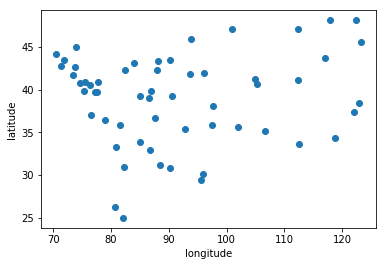

In [8]:
# just plt.plot() plots (x, y) pairs given [x], [y] lists
plt.figure() #이거 없이 만들면 default값으로 표가 만들어 짐. figure로 size  등등 정할 수 있음 figure(figsize=(12,8))
y = [float(city['lat']) for city in all_temps_regions]
#print "y = ",y
x = [float(city['lng']) for city in all_temps_regions]
#print "x = ", x 
plt.plot(x, y, 'o') #o는 그래프의 마커모양 r은 빨강색 x
plt.xlabel('longitude')
plt.ylabel('latitude')
#plt.gca().invert_xaxis() # gca = get current axes(축) 축 뒤집음. 여기서 70부터이면 뒤집으면 120부터 
plt.show()
plt.close()

In [38]:
# pick 4 cities, get temperatues
cities = ['San Francisco', 'Miami', 'New York', 'Boston']
temps = {}
for city_info in all_temps_regions:
    if city_info['city'] in cities:
        temps[city_info['city']] = float(city_info['temp'])
print temps
bars = []
for city in cities:
    bars.append(temps[city])
print "bar = ", bars

{'Miami': 58.0, 'San Francisco': 42.0, 'New York': 27.0, 'Boston': 23.0}
bar =  [42.0, 58.0, 27.0, 23.0]


### Bar Chart
y = [3, 10, 7, 5, 3, 4.5, 6, 8.1]
N = len(y)

x = range(N)

width = 1/1.5

plt.bar(x, y, width, color="blue")

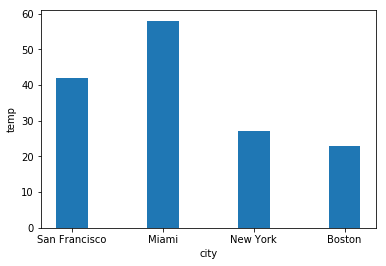

In [45]:
# plot temperatures as barchart
plt.figure()
n = len(bars)
width = 0.35
plt.bar(range(n), bars, width) #range는 list 함수
plt.xlabel('city')
plt.ylabel('temp')
plt.xticks(range(n), cities) # ticks(수치, 그 수치를 대체할 것)
plt.show()
plt.close()

### Pie Chart
### .pie(값들, lable = 이름)

colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue', 'red']
labels = ['삼성전자', 'SK하이닉스', 'LG전자', '네이버', '카카오']
ratio = [50, 20, 10, 10, 10]
explode = (0.0, 0.1, 0.0, 0.0, 0.0)
plt.pie(ratio, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=90)
plt.show()

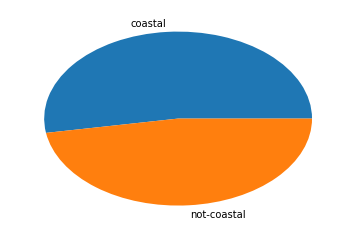

In [7]:
# Number of coastal cities vs non-coastal as piechart
num_coastal = len([city_info['city'] for city_info in all_temps_regions if city_info['coastal'] == 'Y'])
num_not = len(all_temps_regions) - num_coastal
plt.figure()
sizes = [num_coastal, num_not]
labels = ['coastal', 'not-coastal']
plt.pie(sizes, labels=labels) 
plt.show()
plt.close()

### Scatterplot with different colors

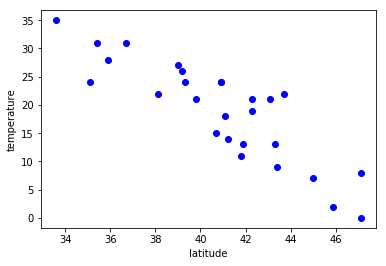

In [48]:
# temp vs latitude scatterplot
# one set for coastal, one set for non-coastal
plt.figure()
y_c = [float(city['temp']) for city in all_temps_regions if city['coastal'] == 'Y']
x_c = [float(city['lat']) for city in all_temps_regions if city['coastal'] == 'Y']
y_n = [float(city['temp']) for city in all_temps_regions if city['coastal'] == 'N']
x_n = [float(city['lat']) for city in all_temps_regions if city['coastal'] == 'N']
plt.plot(x_c, y_c, 'o', color='blue')
plt.plot(x_n, y_n, 'ro')
plt.xlabel('latitude')
plt.ylabel('temperature')
plt.show()
plt.savefig("scatter.png")
plt.close()


### linspace(a,b,c) a에서 b까지 구간을 c개로 나눔
** 제곱

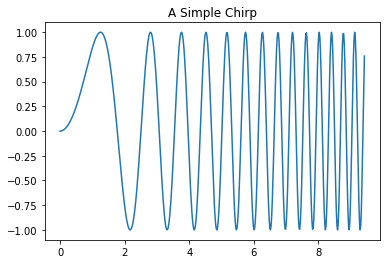

In [9]:
import numpy as np
x = np.linspace(0, 3*np.pi, 500)
plt.plot(x, np.sin(x**2)) #sin X의 젝곱의 함수
plt.title("A Simple Chirp")
plt.show()

### 그래프 여러개
### fig.add_subplot(행(가로), 렬(세로), 몇번째 그래프인지)
(2,1,1)이면 가로로 두개 누운 거에 몇번째 꺼인지

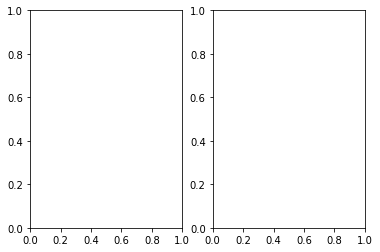

In [10]:
fig = plt.figure()
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)
plt.show()

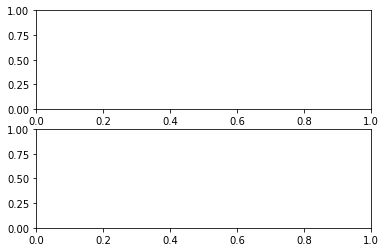

In [11]:
fig = plt.figure()
ax1 = fig.add_subplot(2, 1, 1)
ax2 = fig.add_subplot(2, 1, 2)
plt.show()

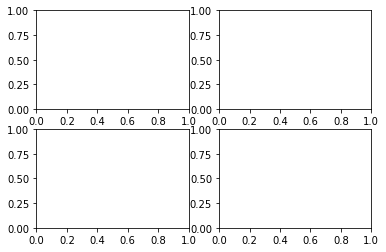

In [12]:
fig = plt.figure()
ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)
ax4 = fig.add_subplot(2, 2, 4)
plt.show()

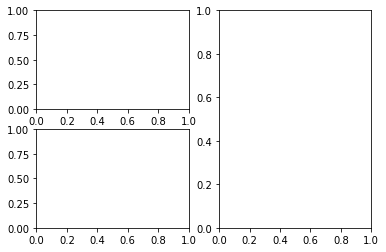

In [54]:
fig= plt.figure()
a1 = fig.add_subplot(2, 2, 1)
a2 = fig.add_subplot(2, 2, 3)
a3 = fig.add_subplot(1, 2, 2)
plt.show()

### arrange(x,y,z) x부터 y까지 z간격으로

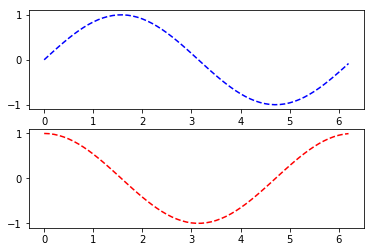

In [13]:
import numpy as np
import matplotlib.pyplot as plt

x = np.arange(0.0, 2 * np.pi, 0.1)
sin_y = np.sin(x)
cos_y = np.cos(x)

fig = plt.figure()
ax1 = fig.add_subplot(2, 1, 1)
ax2 = fig.add_subplot(2, 1, 2)

ax1.plot(x, sin_y, 'b--')
ax2.plot(x, cos_y, 'r--')

plt.show()

### hist(데이터, bins 단위, )
numpy의 평균이 0이고 분산이 1인 표준정규분포를 따르는 랜덤변수르 호출하는 random.randn

bins 나누어 보는 구간(그래프가 양 옆으로 50씩 퍼져 있)
normed 히스토 그램 합이 1
### axis() 앞의 두자리는 x축 뒤의 두자리는 y축

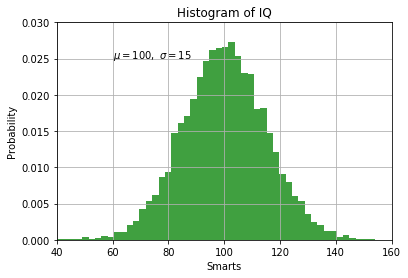

In [57]:
import numpy as np 
import matplotlib.pyplot as plt 
mu, sigma = 100, 15 
x = mu + sigma * np.random.randn(10000) 
# the histogram of the data x
# bins = 50
# normed=1 -> counts normalized to prob. density
# alpha : color strength
n, bins, patches = plt.hist(x, 50, normed=1, facecolor='g', alpha=0.75) 
plt.xlabel('Smarts') 
plt.ylabel('Probability') 
plt.title('Histogram of IQ') 
plt.text(60, .025, r'$\mu=100,\ \sigma=15$') #x, y좌포에 텍스트 표시 r은 이스케이프 문자 안먹히게 text(x, y, s, fontsize=12)
plt.axis([40, 160, 0, 0.03]) 
plt.grid(True) #격자무늬
plt.show()